## **Загрузим данные и необходимые для анализа библиотеки** 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#откроем файлы и изучим датасеты

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [6]:
#изучим общую информацию о файлах

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#изменим названия столбцов, приведем к общепринятому стилю

hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
#приведем формат даты в датафреймах к удобному для дальнейшей работы 

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
#проверим датасеты на наличие дубликатов

hypothesis.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

In [14]:
#проверим не попадют ли пользователи в обе группы

id_group_A = list(orders['visitorId'][orders['group'] == 'A'])
id_group_A

[4069496402,
 78758296,
 295230930,
 879864040,
 3213223594,
 1565034404,
 4227830084,
 3207734412,
 87885904,
 199603092,
 3803269165,
 2378935119,
 834683205,
 237748145,
 1294108251,
 1471496742,
 2735494018,
 3251102545,
 2978730290,
 3660046170,
 1143609305,
 2951649436,
 343208965,
 3055165772,
 1422773200,
 2947100995,
 3290315626,
 2587526707,
 787824685,
 4099262874,
 1110543778,
 3283584911,
 3289144202,
 3736064128,
 2706377257,
 2706377257,
 926057494,
 1830791924,
 381340408,
 611059232,
 1460891116,
 1722579998,
 3379886002,
 821846484,
 4256040402,
 2743474511,
 2038680547,
 2378935119,
 1430210707,
 3213691396,
 3722682546,
 749770631,
 1738359350,
 2254586615,
 2458001652,
 199603092,
 1211585711,
 3967698036,
 678354126,
 611059232,
 611059232,
 3967698036,
 991436984,
 1219079053,
 572335325,
 732900740,
 3891541246,
 2874956069,
 2892265953,
 2892265953,
 2303470071,
 2583793022,
 1581167209,
 1737494355,
 2785040378,
 876081193,
 3123255051,
 1070130208,
 237893511

In [15]:
id_group_B = list(orders['visitorId'][orders['group'] == 'B'])
id_group_B

[3312258926,
 3642806036,
 1196621759,
 2322279887,
 935554773,
 2900797465,
 1882260405,
 927791387,
 728063420,
 2742574263,
 2973109265,
 222718357,
 963407295,
 1379151787,
 1638583360,
 351125977,
 3234906277,
 237748145,
 3591136796,
 4027395615,
 3024988998,
 2038680547,
 258610743,
 2805132315,
 2231389472,
 1110007955,
 114507418,
 2552584164,
 1494664757,
 544632063,
 930356060,
 1215602524,
 1690383497,
 2914239125,
 2570444314,
 5114589,
 1221478247,
 2115666868,
 4256040402,
 2712142231,
 567175747,
 2517115269,
 2868887864,
 1217561296,
 2578486380,
 3427397479,
 2328378067,
 8300375,
 249864742,
 3288820196,
 3499733621,
 2096506107,
 276558944,
 2295217812,
 1253370069,
 3379260072,
 1035424004,
 2742574263,
 3595021912,
 943674707,
 457167155,
 457167155,
 414545763,
 1738775963,
 2019355024,
 3735525502,
 2019205281,
 1700445283,
 3062433592,
 3062433592,
 1225835168,
 2038023866,
 2273809679,
 428219747,
 2663148288,
 162423694,
 916720205,
 4258103007,
 3873846164,


In [16]:
id_group_AB = list(set(id_group_A) & set(id_group_B))
id_group_AB 

[3957174400,
 3984495233,
 2780786433,
 1294878855,
 1648269707,
 1614305549,
 4120364173,
 232979603,
 199603092,
 4266935830,
 2712142231,
 2587333274,
 2716752286,
 3891541246,
 1668030113,
 2654030115,
 3234906277,
 1230306981,
 1404934699,
 3803269165,
 2949041841,
 237748145,
 457167155,
 2927087541,
 1738359350,
 3062433592,
 3656415546,
 818047933,
 393266494,
 963407295,
 471551937,
 2579882178,
 3202540741,
 2686716486,
 1333886533,
 2044997962,
 3941795274,
 1801183820,
 2378935119,
 4256040402,
 4069496402,
 3766097110,
 8300375,
 351125977,
 1602967004,
 276558944,
 2038680547,
 3951559397,
 3963646447,
 4186807279,
 3717692402,
 1959144690,
 2458001652,
 2600415354,
 2954449915,
 1316129916,
 477780734,
 3972127743]

In [17]:
#принимаем решение удалить данные пользователей встречающиеся в обоих группах, для чистоты анализа результатов теста

orders = orders.set_index('visitorId')
orders

,transactionId,date,revenue,group
visitorId,,,,
3312258926,3667963787,2019-08-15,1650,B
3642806036,2804400009,2019-08-15,730,B
4069496402,2961555356,2019-08-15,400,A
1196621759,3797467345,2019-08-15,9759,B
2322279887,2282983706,2019-08-15,2308,B
...,...,...,...,...
3733762160,2662137336,2019-08-14,6490,B
370388673,2203539145,2019-08-14,3190,A
573423106,1807773912,2019-08-14,10550,A


In [18]:
orders = orders.drop([3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 
             4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 
             1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 
             818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 
             3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 
             276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 
             2954449915, 1316129916, 477780734, 3972127743], axis=0)

In [19]:
orders = orders.reset_index()
orders

,visitorId,transactionId,date,revenue,group
0,3312258926,3667963787,2019-08-15,1650,B
1,3642806036,2804400009,2019-08-15,730,B
2,1196621759,3797467345,2019-08-15,9759,B
3,2322279887,2282983706,2019-08-15,2308,B
4,935554773,182168103,2019-08-15,2210,B
...,...,...,...,...,...
1011,608641596,3592955527,2019-08-14,16490,B
1012,3733762160,2662137336,2019-08-14,6490,B
1013,370388673,2203539145,2019-08-14,3190,A
1014,573423106,1807773912,2019-08-14,10550,A


In [20]:
#узнаем дату начала и окончания теста

print('Дата начала А/В теста:', orders['date'].min())
print('Дата окончания А/В теста:', orders['date'].max())

Дата начала А/В теста: 2019-08-01 00:00:00
Дата окончания А/В теста: 2019-08-31 00:00:00


In [21]:
print('Дата начала А/В теста:', visitors['date'].min())
print('Дата окончания А/В теста:', visitors['date'].max())

Дата начала А/В теста: 2019-08-01 00:00:00
Дата окончания А/В теста: 2019-08-31 00:00:00


In [22]:
#узнаем сколько уникальных групп и количество пользователей в каждой 

orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

In [23]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

Таблица `hypothesis` содержит пять столбцов: 

* `hypothesis` — краткое описание гипотезы;
* `reach` — охват пользователей по 10-балльной шкале;
* `impact` — влияние на пользователей по 10-балльной шкале;
* `confidence` — уверенность в гипотезе по 10-балльной шкале;
* `efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица `orders` также содержит пять столбцов:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

И таблица `visitors` только три столбца: 

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Изучив исходные данные была проделана работа по предобработке данных:

* В датасетe `hypothesis` привели название столбцов к общепринятому, для удобства дальнейшей работы с ним.
* Изучили наличие пропусков в датафреймах, они отсутствуют.
* Преобразовали тип данных, в столбцах содержащих данные о дате, в формат для удобства дальнейшей работы в проекте.
* Проверили датасеты на наличие дубликатов, их также не обнаружили.
* Нашли пользователей которые попадают в обе группы теста, удалили их для чистоты анализ результатов теста.
* Определили дату начала (2019-08-01) и дату окончания (2019-08-31) теста. 
* Узнали сколько уникальных групп (А, В) и количество пользователей в каждой.

## **Часть первая. Приоритизация гипотез.**

### Применим фреймворк ICE для приоритизации гипотез.

In [24]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

pd.options.display.max_colwidth = 210

hypothesis['ICE'] = round(hypothesis['ICE'], 1)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективные гипотезы по ICE: 8, 0, 7

### Применим фреймворк RICE для приоритизации гипотез. 

In [25]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

pd.options.display.max_colwidth = 210

hypothesis['RICE'] = round(hypothesis['RICE'], 1)

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [26]:
#RICE показатель более результативный, по параметру reach, отсортируем по RICE датафрейм с обоими метриками

hipothesis_ice_rice = hypothesis[['hypothesis', 'ICE', 'RICE']]

hipothesis_ice_rice.sort_values(by='RICE', ascending=False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6

### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

На первое место после применения фреймворка RICE вышла гипотеза под номером 7. Так как ее параметр `reach` равен максимальной оценке 10, в то время как у других гипотез он меньше. Гипотеза №7 затронет большее количество пользователей в отличии от других.  

## Часть вторая. Анализ A/B-теста.

### Построим график кумулятивной выручки по группам.

In [27]:
#создадим массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates() 

In [28]:
#получим агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({'date': 'max',
           'group': 'max',
           'transactionId': 'nunique',
           'visitorId': 'nunique',
           'revenue': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
#получим агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
#объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [31]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


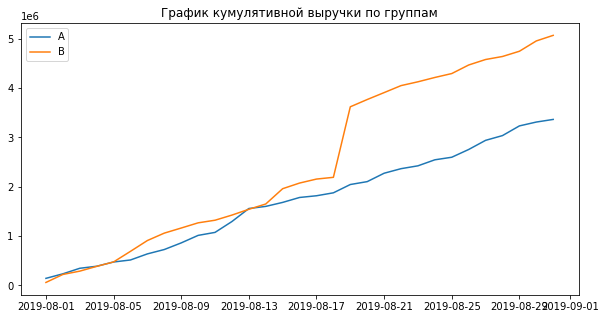

In [32]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А

plt.figure(figsize=(10, 5)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам'); 

В середине теста сегмент В имеет резкий скачок, после которого до окончания остается лидером с отрывом. Возможно, влияет наличие аномально больших заказов. При заключительном анализе их нужно будет удалить. 

### Построим график кумулятивного среднего чека по группам. 

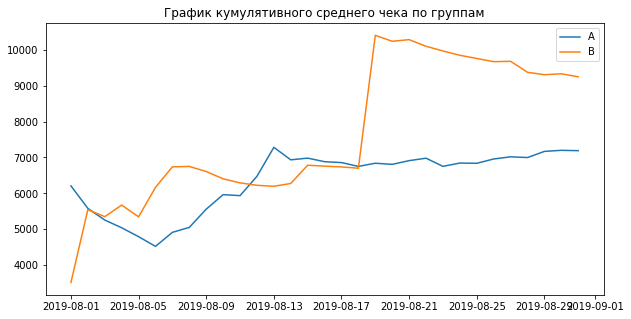

In [33]:
#построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

plt.figure(figsize=(10, 5)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам');

Кумулятивное значение среднего чека колеблется, снова говорит о возиожных влияниях аномалий.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

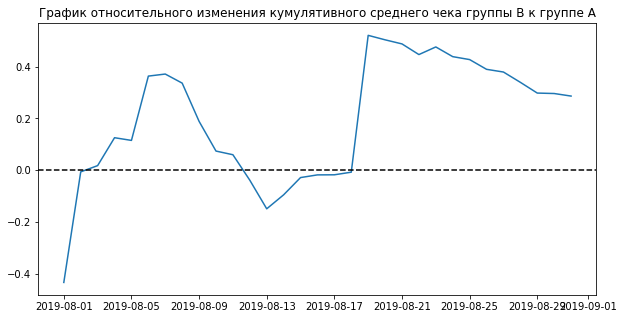

In [34]:
#собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5)) 

#cтроим отношение средних чеков

plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#добавляем ось X

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А');

Видим точки где график различия между сегментами резко скачет, снова указывает на наличие выбросов и аномалий. 

### Постройте график кумулятивной конверсии по группам.

In [35]:
#получим максимальное значение даты для оси х

orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [36]:
#получим минимальное значение даты для оси х

orders['date'].min()

Timestamp('2019-08-01 00:00:00')

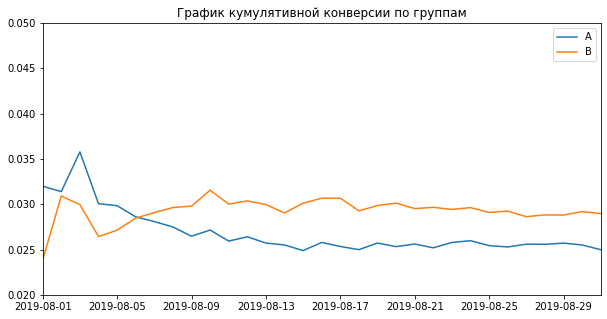

In [37]:
#считаем кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим графики

plt.figure(figsize=(10, 5)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

#задаем масштаб осей

plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05]);

Группы начали близкую друг к гругу траекторию, затем конверсия группы В вырвалась вперед и весь оставшийся отрезок была впереди.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A.

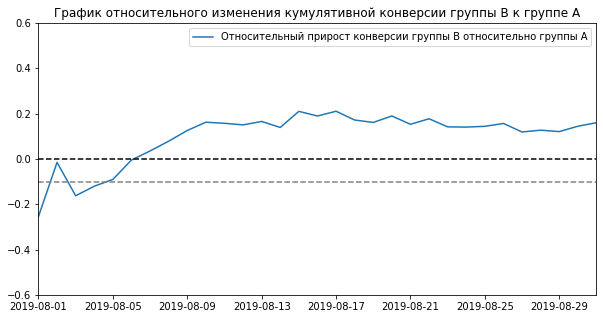

In [38]:
#объединяем данные конверсии по группам в один датафрейм

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим графики

plt.figure(figsize=(10, 5)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions[
    'conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]); 

В самом начале конверсия группы В колебалась, но почти сразу вырвалась вперед и до последнего была в лидерах. 

### Построим точечный график количества заказов по пользователям.

In [39]:
#создадим датафрейм orderByUsers с двумя столбцами идентификатор заказа и идентификатор пользователя совершившего заказ

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


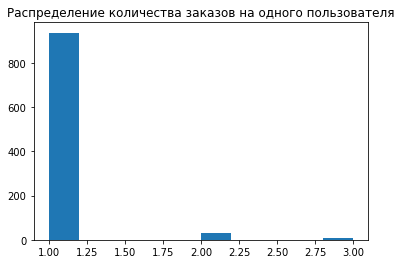

In [40]:
#построим гистрограмму распределения количества заказов на одного пользователя.

plt.hist(ordersByUsers['orders'])
plt.title('Распределение количества заказов на одного пользователя'); 

Большинство покупателей заказывают только один раз. Также есть занчительная доля с 2-4 заказами.

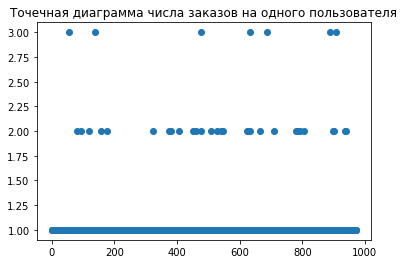

In [41]:
#построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечная диаграмма числа заказов на одного пользователя');

Достаточное количество пользователей с 2-3 заказами, неизвестна их доля, чтобы считать аномалиями или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [42]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей с двумя заказами и не более 1% имеет 4 заказа. За верхнюю границу числа заказов возьмем 3 заказа на одного пользователя, по ней в дальнейшем исследовании отсеем аномальных пользователей.  

### Построим точечный график стоимостей заказов.

In [43]:
print(orders.sort_values(by='revenue', ascending=False).head(15))

       visitorId  transactionId       date  revenue group
365   1920142716      590470918 2019-08-19  1294500     B
1015  2108080724     3936777065 2019-08-15   202740     B
971   1307669133      666610489 2019-08-13    92550     A
632    888512513     3668308183 2019-08-27    86620     B
631   4133034833     3603576309 2019-08-09    67990     A
939   1164614297     1348774318 2019-08-12    66350     A
937    148427295      316924019 2019-08-12    65710     A
811    887908475     1347999392 2019-08-21    60450     A
802   4003628586     2420050534 2019-08-08    58550     B
109   2254586615     3163614039 2019-08-22    53904     A
241   2254456485      587872075 2019-08-24    53904     A
524   3931967268     4071177889 2019-08-07    53904     B
865   2261934787     1861540412 2019-08-10    52900     A
977   2606908679     3815014015 2019-08-13    52900     B
972    759473111     2183069967 2019-08-13    52480     A


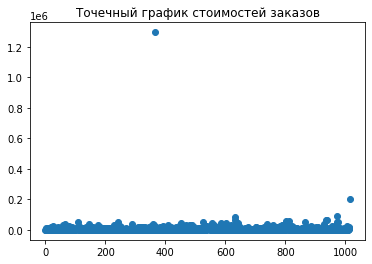

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов');

Один заказ стоимотью 200 тысяч и один заказ стоимостью аж 1млн 294тыс. Аномально выглядят данные заказы.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не больше, чем у 5% заказов чек дороже 26тыс. И не более чем у 1% заказов - дороже 53904. Выберем границу для определения аномальных заказов 53904.     

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.

H_0 (Нулевая гипотеза): Среднее количество заказов группы А = Среднему количеству заказов группы В 

H_1 (Альтернативная гипотеза): Среднее количество заказов группы А ≠ Среднему количеству заказов группы В

alpha = 0.05

In [46]:
#начнем с подготовки данных

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Название и значения столбцов:

* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [47]:
#создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'] 
#в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [57]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), name='orders',),], axis=0,)

sampleB = pd.concat([
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders',),], axis=0,)

In [49]:
#посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего группы В по "сырым" данным:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительный прирост среднего группы В по "сырым" данным: 0.160


p-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ по "сырым данным" показал что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16% 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

H_0 (Нулевая гипотеза): Средний чек заказа группы А = Среднему чеку заказа группы В 

H_1 (Альтернативная гипотеза): Средний чек заказа группы А ≠ Среднему чеку заказа группы В

alpha = 0.05

In [50]:
print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего группы В по "сырым" данным:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.82949
Относительный прирост среднего группы В по "сырым" данным: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в статистической значимости есть различия, нет. Относительное различие среднего чека между сегментами 28,7%

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 

In [51]:
#для начала избавимся от аномалий

#уберем пользователей с числом заказа больше 3

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)

#уберем заказы дороже 53904

usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

937     148427295
811     887908475
632     888512513
939    1164614297
971    1307669133
Name: visitorId, dtype: int64

In [52]:
#создадим переменные sampleAFiltered и sampleBFiltered 
#в которых сохраним очищенные данные о заказах — не включая аномальных пользователей

sampleAFiltered = pd.concat([ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), name='orders',),], axis=0,
)

sampleBFiltered = pd.concat([ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders',),], axis=0,
) 

In [53]:
#посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего группы В по "очищенным" данным:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.00969
Относительный прирост среднего группы В по "очищенным" данным: 0.164


Результаты по среднему количеству заказов практически не изменились. Статистическая значимость достигнута. Сегмент В лучше сегмента А. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [54]:
print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],)[1])
)

print('Относительный прирост среднего группы В по "очищенным" данным:', 
    "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1)
) 

p-value: 0.90069
Относительный прирост среднего группы В по "очищенным" данным: -0.032


p-value увеличился, а разница между сегментами ушла в минус после удаления аномальных значений на 3%. После удаления аномалий в данных стало меньше "шума".   

### Примем решение по результатам теста.

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
* Различие конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Исходя из фактов выше: Принимаем решение остановить тест, признать его успешным. Зафиксировать победу сегмента В.

## Общий вывод.

* Было проведено исследование по приоритизации гипотез и анализа результатов А/В теста. Входные данные - файл содержащий 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effor; файлы с результатами  А/В теста.
* В ходе исследования были изучены входные данные, приоритизированы гипотезы, проведен анализ результатов А/В теста. 
* Применили фраймворки ICE и RICE для приоритизации. Итогом выделили гипотезу №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Так как ее параметр reach равен максимальной оценке 10, в то время как у других гипотез он меньше. Гипотеза №7 затронет большее количество пользователей в отличии от других.
* Провели анализ результатов А/В теста: построили графики кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A. Выявили аномальные значения в данных, посчитали статистическую значимость по "сырым данным" и по "очищенным данным" после фильтрации от аномальных значений.  
* По результатам исследования сделали выводы: Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть. Различие конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* Приняли решение остановить тест, признать его успешным и зафиксировать победу сегмента В. 